In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
sales = pd.read_csv('coffee-sales.csv', parse_dates=['Date'])


In [14]:
sales.head()


,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107,176,292,116,69,38,962,110,110,160,270,2,2004-01-10,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75,135,225,90,60,29,1148,90,80,130,210,2,2007-01-10,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122,195,325,130,73,42,1134,130,110,180,290,2,2011-01-10,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105,174,289,115,69,37,1166,110,100,160,260,2,2012-01-10,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104,135,223,90,56,29,1148,90,80,130,210,2,2007-01-11,Coffee,Columbian,Regular


In [15]:
# How much were sold for each product?


In [20]:
pivot_product = sales.pivot_table(values='Sales', index=['Product', 'Product Type'], aggfunc='sum')


In [21]:
pivot_product


,,Sales
Product,Product Type,
Amaretto,Coffee,26269
Caffe Latte,Espresso,35899
Caffe Mocha,Espresso,84904
Chamomile,Herbal Tea,75578
Columbian,Coffee,128311
Darjeeling,Tea,73151
Decaf Espresso,Espresso,78162
Decaf Irish Cream,Coffee,62248
Earl Grey,Tea,66772


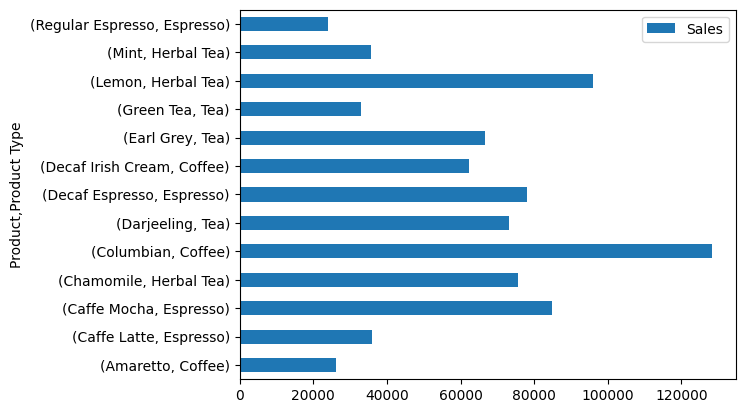

In [26]:
pivot_product.plot(kind='barh')
plt.show()

In [27]:
# Average profit and total expenses for each state


In [31]:
pivot_average = sales.pivot_table(values=['Profit', 'Total Expenses'], index='State', aggfunc='mean')


In [32]:
pivot_average


,Profit,Total Expenses
State,,
California,110.364583,80.631944
Colorado,67.208333,45.996212
Connecticut,45.363095,48.190476
Florida,56.990741,50.967593
Illinois,142.689815,63.208333
Iowa,102.833333,54.805556
Louisiana,43.779762,42.750000
Massachusetts,114.180556,46.979167
Missouri,16.671296,44.634259


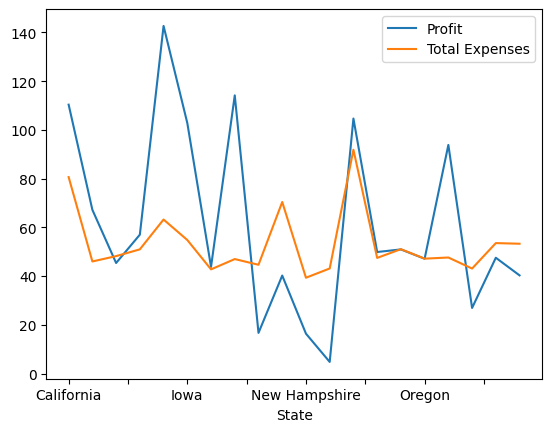

In [34]:
pivot_average.plot()
plt.show()


In [35]:
# Sales per Quarter
sales['quarter'] = sales['Date'].dt.to_period('Q')


In [36]:
sales.head()


,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,...,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type,quarter
0,203,Connecticut,East,Small Market,107,176,292,116,69,38,...,110,110,160,270,2,2004-01-10,Coffee,Columbian,Regular,2004Q1
1,203,Connecticut,East,Small Market,75,135,225,90,60,29,...,90,80,130,210,2,2007-01-10,Coffee,Columbian,Regular,2007Q1
2,203,Connecticut,East,Small Market,122,195,325,130,73,42,...,130,110,180,290,2,2011-01-10,Coffee,Columbian,Regular,2011Q1
3,203,Connecticut,East,Small Market,105,174,289,115,69,37,...,110,100,160,260,2,2012-01-10,Coffee,Columbian,Regular,2012Q1
4,203,Connecticut,East,Small Market,104,135,223,90,56,29,...,90,80,130,210,2,2007-01-11,Coffee,Columbian,Regular,2007Q1


In [37]:
# What are the overall quarterly sales trends for each product in a state?


In [46]:
pivot_quarterly = sales.pivot_table(values='Sales', columns='quarter', index=['State', 'Product'], aggfunc='sum', margins=True)


In [47]:
pivot_quarterly


quarter                       2001Q1  2002Q1  2003Q1  2004Q1  2005Q1  2006Q1  \
State      Product                                                             
California Amaretto              307     273     258     227     211     191   
           Caffe Latte           966     944     987     987    1037    1037   
           Caffe Mocha           530     599     616     616     575     687   
           Chamomile             496     479     483     506     510     599   
           Columbian            1437    1332    1394    1471    1505    1772   
...                              ...     ...     ...     ...     ...     ...   
Wisconsin  Decaf Espresso        233     227     231     213     219     219   
           Decaf Irish Cream     381     372     388     403     406     422   
           Earl Grey             381     320     310     310     307     255   
           Lemon                 172     238     250     250     259     287   
All                            66871   66284   66600   68055   67086   69932   

quarter                       2007Q1  2008Q1  2009Q1  2010Q1  2011Q1  2012Q1  \
State      Product                                                             
California Amaretto              173     173     225     225     240     211   
           Caffe Latte          1059    1059    1029     987     874    1035   
           Caffe Mocha           771     820     599     616     597     665   
           Chamomile             621     643     506     547     409     434   
           Columbian            1816    1812    1632    1343    1287    1444   
...                              ...     ...     ...     ...     ...     ...   
Wisconsin  Decaf Espresso        229     137     157     105     107     116   
           Decaf Irish Cream     452     460     411     417     372     403   
           Earl Grey             225     209     308     297     304     271   
           Lemon                 287     307     260     244     161     176   
All                            71991   71736   68361   67836   66106   68953   

quarter                          All  
State      Product                    
California Amaretto             2714  
           Caffe Latte         12001  
           Caffe Mocha          7691  
           Chamomile            6233  
           Columbian           18245  
...                              ...  
Wisconsin  Decaf Espresso       2193  
           Decaf Irish Cream    4887  
           Earl Grey            3497  
           Lemon                2891  
All                           819811  

[178 rows x 13 columns]

In [48]:
# What is the average profit per market size?

In [49]:
pivot_market_size = sales.pivot_table(values='Sales', index=['Market', 'Market Size'], aggfunc='mean')


In [50]:
pivot_market_size


Sales
Market  Market Size             
Central Major Market  219.222701
        Small Market  173.558642
East    Major Market  250.471014
        Small Market  119.988095
South   Major Market  222.678571
        Small Market  131.976190
West    Major Market  336.430556
        Small Market  166.071970

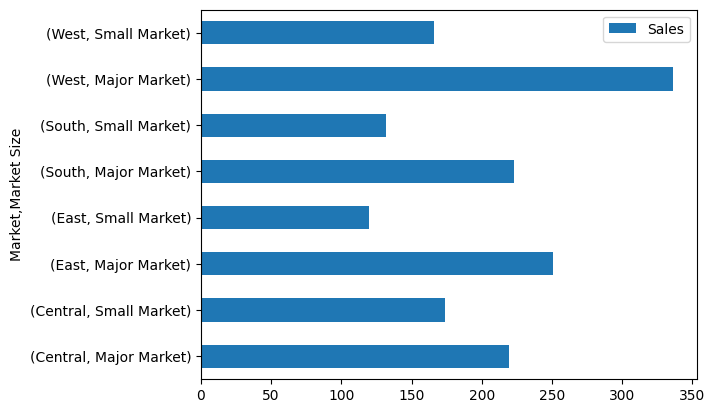

In [71]:
pivot_market_size.plot(kind='barh')
plt.show()

In [72]:
# Create a summary matrix


In [82]:
summary = pd.DataFrame({'Sales': [], 'Profit': []})


In [83]:
summary.loc['mean'] = sales.mean(numeric_only=True)
summary.loc['median'] = sales.median(numeric_only=True)
summary.loc['std'] = sales.std(numeric_only=True)
summary.loc['max'] = sales.max(numeric_only=True)
summary.loc['min'] = sales.min(numeric_only=True)


In [84]:
summary


,Sales,Profit
mean,192.987524,61.097693
median,138.000000,40.000000
std,151.133127,101.708546
max,912.000000,778.000000
min,17.000000,-638.000000


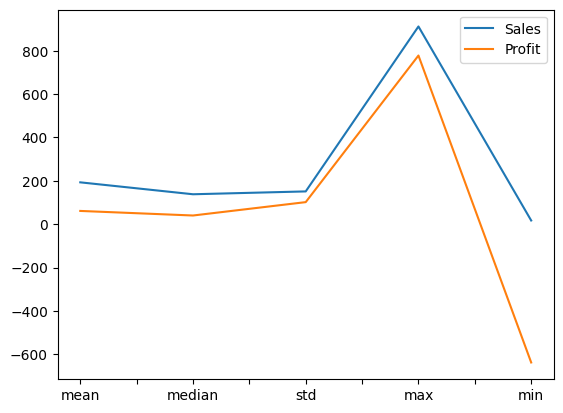

In [86]:
summary.plot()
plt.show()
